# Felipe Castillo
# MileStone
# Predictive Analytics
# 07/29/2022

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score ,accuracy_score,mean_squared_error,recall_score,f1_score,precision_score,confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split



Will I be able to answer the questions I want to answer with the data I have?

What visualizations are especially useful for explaining my data?

Do I need to adjust the data and/or driving questions?

Do I need to adjust my model/evaluation choices?

Are my original expectations still reasonable?

Please submit Milestone 3 in Blackboard under the group submission link.

This should be submitted through the group assignment submission regardless if it is an independent project or multi-person group.


In [2]:
# Change directory to work with data set
os.chdir("C:\DataScience_DSC_630\Week2")

In [3]:
#load data set
bank_loan_dt = pd.read_csv("Training Data.csv")

In [4]:
bank_loan_dt.head(3)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0


In [5]:
#droping Id does not hold any useful information
bank_loan_dt = bank_loan_dt.drop(['Id'] , axis= 1)

In [6]:
corrMatrix = bank_loan_dt.corr()

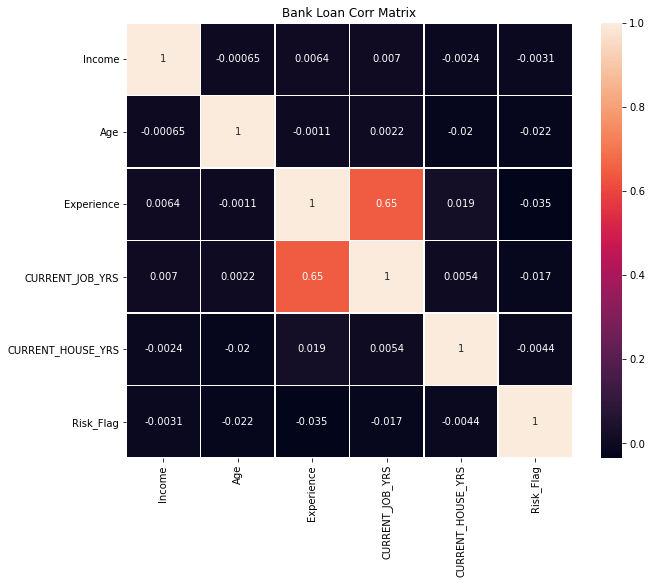

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrMatrix, annot= True,linewidths=.5, ax=ax)
plt.title("Bank Loan Corr Matrix")
plt.show()

In [8]:
list(enumerate(bank_loan_dt))

[(0, 'Income'),
 (1, 'Age'),
 (2, 'Experience'),
 (3, 'Married/Single'),
 (4, 'House_Ownership'),
 (5, 'Car_Ownership'),
 (6, 'Profession'),
 (7, 'CITY'),
 (8, 'STATE'),
 (9, 'CURRENT_JOB_YRS'),
 (10, 'CURRENT_HOUSE_YRS'),
 (11, 'Risk_Flag')]

In [9]:
#Will wold all numerical values
bank_loan_numerical =  bank_loan_dt.drop(['Profession' ,'CITY','STATE','Married/Single','House_Ownership','Car_Ownership','Risk_Flag'] , axis= 1).copy()

In [10]:
#Getting a basic understanding with the numerical data
bank_loan_numerical.head(2)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,3,13
1,7574516,40,10,9,13


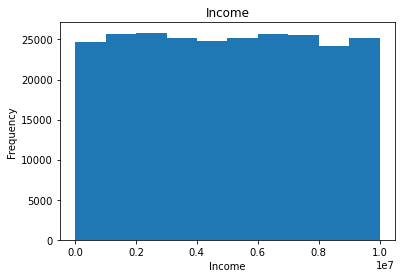

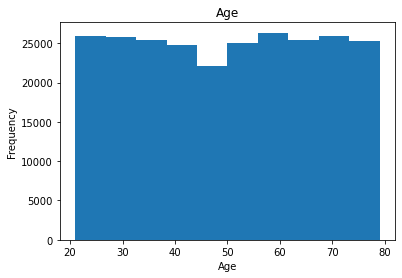

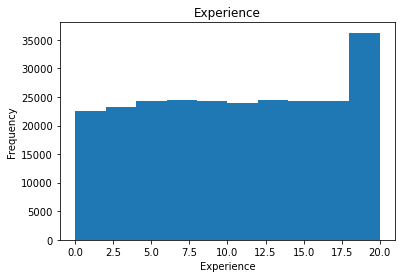

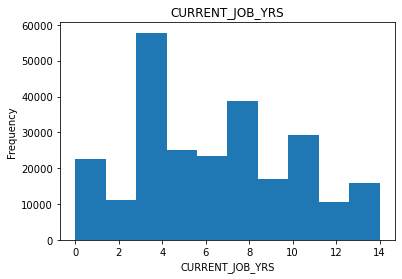

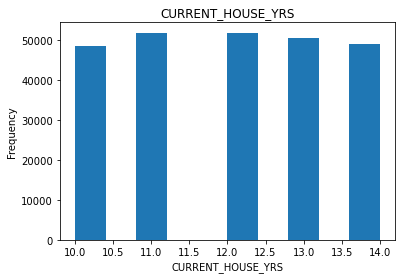

In [12]:
#builing a tuple struct that is numbered, and call directly by index
for i in list(enumerate(bank_loan_numerical)):
    plt.title(i[1])
    plt.hist(bank_loan_dt[i[1]])
    plt.ylabel("Frequency")
    plt.xlabel(i[1])
    plt.show()

Text(0.5, 1.0, 'Home Ownershop')

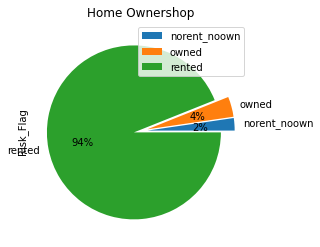

In [16]:
#Seeing the flagged risk by home ownership
bank_loan_dt.groupby(['House_Ownership']).sum().plot(kind='pie', y='Risk_Flag', autopct='%1.0f%%', explode = (0.08, 0.08, 0.08))
plt.title("Home Ownershop")

Text(0.5, 1.0, 'Car Ownership')

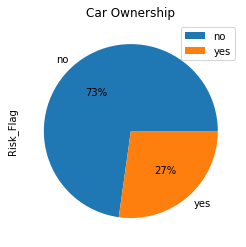

In [17]:
#Seeing the flagged risk by car ownership
bank_loan_dt.groupby(['Car_Ownership']).sum().plot(kind='pie', y='Risk_Flag', autopct='%1.0f%%')
plt.title("Car Ownership")

Text(0.5, 1.0, 'Married/Single')

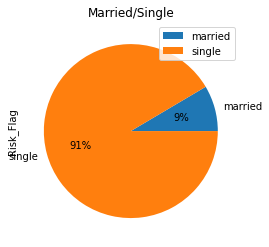

In [14]:
#Seeing the flagged risk by realtionship status
bank_loan_dt.groupby(['Married/Single']).sum().plot(kind='pie', y='Risk_Flag', autopct='%1.0f%%')
plt.title("Married/Single")

In [15]:
#Identifying risk by profession
profession_table = pd.pivot_table(data= bank_loan_dt, index='Profession', values='Risk_Flag')
profession_table.head(5)

,Risk_Flag
Profession,
Air_traffic_controller,0.135391
Analyst,0.121465
Architect,0.131200
Army_officer,0.152113
Artist,0.122609


In [16]:
#making a dictionary mapped to flagged percentage 
#profession is key risk is value 
risk_factors_dic = {}

#Index is profession 
#For each profession by index
for i in range(len(profession_table.index)):
    #mapped dictionary by profession and by the risk profession score
    risk_factors_dic[profession_table.index[i]] = profession_table['Risk_Flag'][i]
print(risk_factors_dic)  
    
    

{'Air_traffic_controller': 0.1353910244271918, 'Analyst': 0.12146529562982006, 'Architect': 0.13120034356882113, 'Army_officer': 0.15211328041192876, 'Artist': 0.1226085167660975, 'Aviator': 0.13493064312736444, 'Biomedical_Engineer': 0.12755997659449972, 'Chartered_Accountant': 0.15357222345871355, 'Chef': 0.12146709816612729, 'Chemical_engineer': 0.11162343900096061, 'Civil_engineer': 0.1358318890814558, 'Civil_servant': 0.11579424427826875, 'Comedian': 0.11960448754516068, 'Computer_hardware_engineer': 0.12844378257632166, 'Computer_operator': 0.12404809619238477, 'Consultant': 0.1252079866888519, 'Dentist': 0.109577582601422, 'Design_Engineer': 0.1069993656164094, 'Designer': 0.10917790343627665, 'Drafter': 0.1128941966784848, 'Economist': 0.09927837305926088, 'Engineer': 0.11808300395256917, 'Fashion_Designer': 0.11538461538461539, 'Financial_Analyst': 0.10315463518482679, 'Firefighter': 0.13578877301974707, 'Flight_attendant': 0.12363494539781592, 'Geologist': 0.144263698630137, 

In [17]:
#Easier to work with data frame , mapping dictionary to dataframe
risk_factor_df = pd.DataFrame(list(risk_factors_dic.items()), columns=['Careers','Risk_Score'])

<BarContainer object of 51 artists>

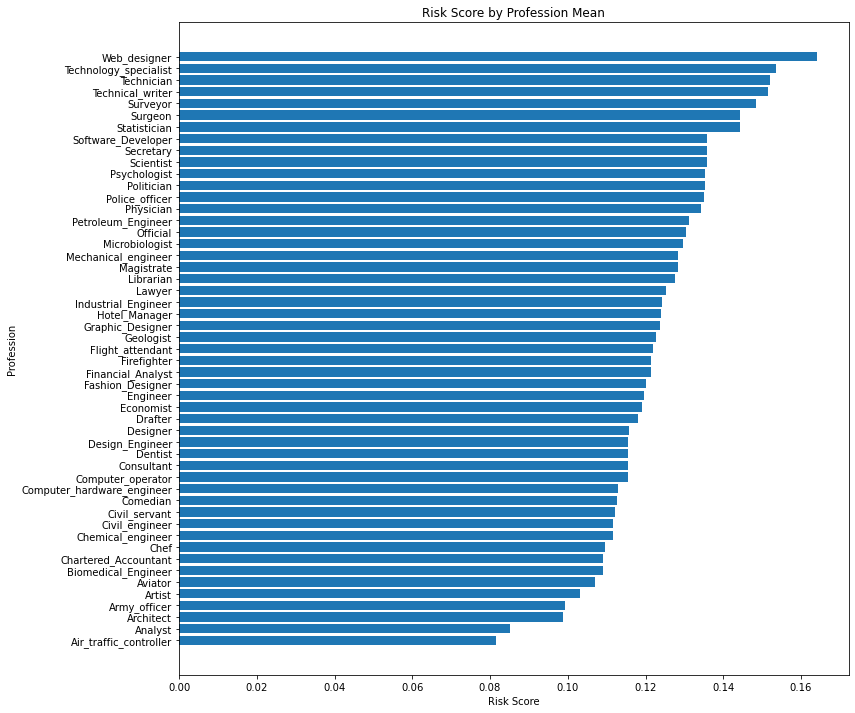

In [18]:
plt.figure(figsize=(12,12))
plt.title("Risk Score by Profession Mean")
plt.ylabel("Profession")
plt.xlabel("Risk Score")
plt.barh( risk_factor_df['Careers'],sorted(risk_factor_df['Risk_Score']))

In [19]:
bank_loan_dt.head(3)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0


In [19]:
age_group  = bank_loan_dt.groupby(['Age'])

In [20]:
#Identifying risk by age and seeing if there is a trend.
#Risk will be determined by levels of salary.
age_group.first()

,Income,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Age,,,,,,,,,,,
21,4128828,10,single,rented,no,Computer_hardware_engineer,Khammam,Telangana,10,12,0
22,6623263,4,single,rented,no,Designer,Adoni,Andhra_Pradesh,4,14,0
23,1303834,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
24,7566849,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
25,6868118,16,single,rented,no,Secretary,Danapur,Bihar,13,13,1
26,5023035,10,single,rented,yes,Petroleum_Engineer,Madurai,Tamil_Nadu,9,13,0
27,4260004,5,single,norent_noown,no,Police_officer,Sagar,Madhya_Pradesh,5,13,0
28,9120988,9,single,rented,no,Physician,Erode[17],Tamil_Nadu,9,12,0
29,1240330,18,married,rented,yes,Consultant,Gopalpur,West_Bengal,12,14,0


Text(0.5, 0, 'Age')

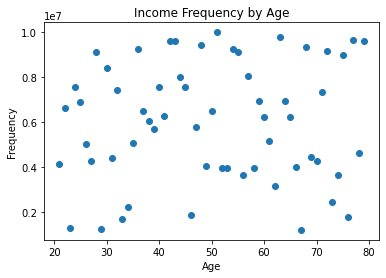

In [22]:
#Getting and idea on distribution
#Example of earning between ages.
# Trying to establish a connection with income, doesnt look like age is a factor to earning. 
plt.scatter(age_group['Age'].first(), age_group['Income'].first())
plt.title("Income Frequency by Age")
plt.ylabel("Frequency")
plt.xlabel("Age")


In [23]:
bank_loan_dt.head(3)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0


In [24]:
#Identifying risk by state
state_risk_count = bank_loan_dt.groupby(['STATE']).sum()
state_risk_count

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
STATE,,,,,,
Andhra_Pradesh,128774135101,1258351,254191,157165,302053,2935
Assam,34191471977,363308,69798,43373,84306,930
Bihar,100011519383,984349,202738,128559,237338,2583
Chandigarh,2770147655,32881,7200,3789,8133,61
Chhattisgarh,19374650965,189092,38262,23339,46446,511
Delhi,27715045558,278091,53789,34934,65612,574
Gujarat,57022857402,572202,117116,73267,136820,1343
Haryana,38497627381,398957,82105,49341,96069,980
Himachal_Pradesh,3530005560,38338,9596,5524,10306,111


<BarContainer object of 29 artists>

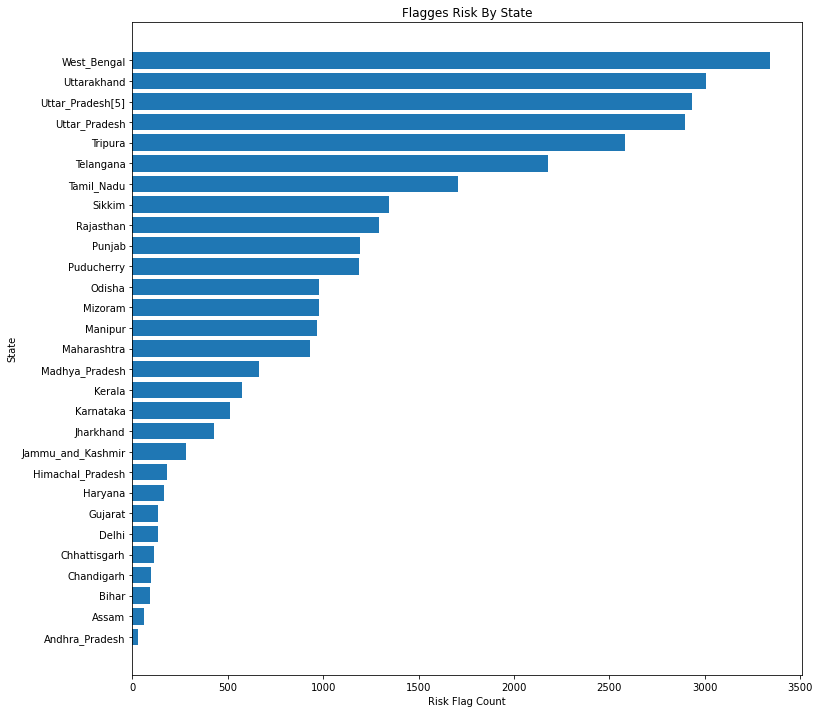

In [25]:
plt.figure(figsize=(12,12))
plt.title("Risk By State")
plt.ylabel("State")
plt.xlabel("Risk Flag Count")
#sorting based off the number of risk
plt.barh( state_risk_count.index,sorted(state_risk_count['Risk_Flag']))

In [26]:
bank_loan_dt.head(1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0


# Adding Classification Before Model

In [7]:
#young adults(ages 18-35 years; n = 97), 
#middle-aged adults (ages 36-55 years, n = 197), 
#and older adults (aged older than 55 years, n = 49).
#https://pubmed.ncbi.nlm.nih.gov/11815703/   

#Taking the Age value and returning the group it stands in
# the age group is taken from the government article, to define age groups

def age_classification(age):
    #initializing value to none 
    age_value = None
    #taking age and returning value 
    #using artilce to base classification age
    if(age >= 18 and age <=35):
        age_value = 'young_adults'
    elif(age>=36 and age<=55):
        age_value = 'middle_aged_adults'
    elif(age> 55):
        age_value = 'older_adult'
    else:
        age_value = None
    return age_value
    
        

In [8]:
#https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx
#$25,471.00	$84,372.00	$187,094.00 example for maryland

#seems like salary average are close to the united states
#there is a difference seems like high salaries accounting for that in placement
#assumption is that salaries are similar so this will serve as a base line
def salary_classification(salary):
    #initializing value to none 
    salary_value = None
    #taking salary and returning value 
    #using artilce to base classification salary
    if( salary <=50000):
        salary_value = 'low_income'
    elif(salary >50000 and salary<=120000):
        salary_value = 'middle_income'
    elif(salary >120000):
        salary_value= 'high_income'
    else:
        salary_value = None
    return salary_value

In [9]:
#To prove this assumption, I am taking the min , median, and max

#seeing if other other values need to have a classification add to it.
#for example can we establish what a low experience at work would be? And does it matter.

min_yr_job = bank_loan_dt['CURRENT_JOB_YRS'].min()
mid_yr_job = bank_loan_dt['CURRENT_JOB_YRS'].median()
max_yr_job = bank_loan_dt['CURRENT_JOB_YRS'].max()


min_yr_house = bank_loan_dt['CURRENT_HOUSE_YRS'].min()
mid_yr_house = bank_loan_dt['CURRENT_HOUSE_YRS'].median()
max_yr_house = bank_loan_dt['CURRENT_HOUSE_YRS'].max()


min_ex_job = bank_loan_dt['Experience'].min()
mid_ex_job = bank_loan_dt['Experience'].median()
max_ex_job = bank_loan_dt['Experience'].max()




#At this point i will not use these as a classification and keep these as is. 
print("Years in job : Lowest Score {}\nMiddle Score {}\nHighest score {} ".format(min_yr_job,mid_yr_job, max_yr_job), '\n')
print("Years in house : Lowest Score {}\nMiddle Score {}\nHighest score {} ".format(min_yr_house,mid_yr_house, max_yr_house), '\n')
print("Years in job : Lowest Score {}\nMiddle Score {}\nHighest score {} ".format(min_ex_job,mid_ex_job, max_ex_job))

Years in job : Lowest Score 0
Middle Score 6.0
Highest score 14  

Years in house : Lowest Score 10
Middle Score 12.0
Highest score 14  

Years in job : Lowest Score 0
Middle Score 10.0
Highest score 20 


In [10]:
#New column Age_Group
bank_loan_dt['Age_Group'] = bank_loan_dt['Age'].apply(age_classification)
bank_loan_dt['Income_Group'] = bank_loan_dt['Income'].apply(salary_classification)


In [12]:
#adding classifiers to data frame
bank_new_classifiers = bank_loan_dt[['Age_Group','Income_Group']]

In [13]:
bank_new_classifiers.head(3)

,Age_Group,Income_Group
0,young_adults,high_income
1,middle_aged_adults,high_income
2,older_adult,high_income


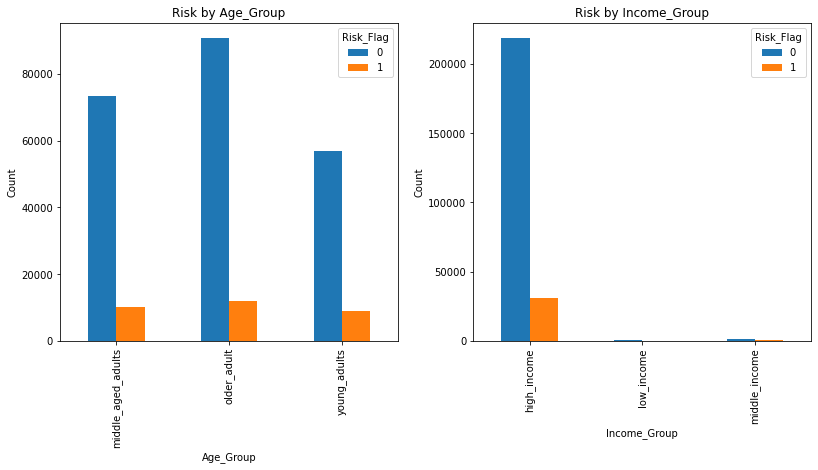

In [14]:
#Setting figure size
fig = plt.figure(figsize=(12,12))
#initializing count to 1
count = 1
#taking each column in bank_new_classifiers
#Should consist of 2 
for i in bank_new_classifiers.columns.values:
    #2 plots will show the subplot will be set to 2 and 2
    ax = plt.subplot(2,2,count)
    
    #for each bank column plot by risk
    pd.crosstab(bank_new_classifiers[i],bank_loan_dt['Risk_Flag']).plot(kind='bar',ax=ax)
    plt.tight_layout(pad=3.0)
    
    #Setting title to instance of first columns
    plt.title("Risk by "+ i)
    plt.xlabel(i)
    plt.ylabel("Count")
    
    #counter increment for new plot
    count = count + 1

# Data Perpertation 

In [15]:
#splitting exited as main target, this shows if person has left the bank
#splitting all other columns to features 

#loading data from trainning set
target = bank_loan_dt[['Risk_Flag']]

#encoding data set
features = pd.get_dummies(bank_loan_dt.drop(['Risk_Flag'],  axis = 1))

In [16]:
target.shape

(252000, 1)

In [17]:
features.shape

(252000, 416)

In [18]:
#standarized data
scaler = StandardScaler()

In [19]:
featured_scaled = scaler.fit_transform(features)

In [20]:
#instantiating PCA
#setting to 50 components rather then 416
pca = PCA(n_components= 50)

#Setting to a lower amount of components
features_pca = pca.fit_transform(features)

In [21]:
#Splitting data into training and test 
features_train, features_test, target_train, target_test = train_test_split(features_pca, target, test_size=.20)

# Main Model Random Forest

In [22]:
#instantiating class
RandForClass = RandomForestClassifier()

In [23]:
model = RandForClass.fit(features_train, np.ravel(target_train))

In [24]:
predicted = model.predict(features_test)

In [25]:
accuracy_score(target_test,predicted)

0.9057142857142857

In [26]:
recall_score(target_test,predicted)

0.4813023855577047

In [27]:
precision_score(target_test,predicted)

0.6606194690265487

In [28]:
f1_score(target_test,predicted)

0.556881760537113

# Test Logestic Regression Model Against Random Forest

In [29]:
LogReg = LogisticRegression()

In [30]:
l_model = LogReg.fit(features_train, np.ravel(target_train))

In [33]:
l_predicted = l_model.predict(features_test)

In [34]:
accuracy_score(target_test,l_predicted)

0.5058531746031746

In [35]:
recall_score(target_test,l_predicted)

0.5261121856866537

In [36]:
precision_score(target_test,l_predicted)

0.1293749256807642

In [37]:
f1_score(target_test,l_predicted)

0.20767982693347758

# Cross Validation

In [53]:
#random forest is the better model all around.
#it has a higher recall and precision score
#cross validating 
results = confusion_matrix(target_test,predicted)
results

array([[42090,  2012],
       [ 3050,  3248]], dtype=int64)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

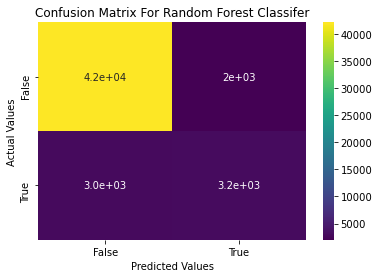

In [61]:
#setting up heat map
cr = sns.heatmap(results, annot= True, cmap='viridis')
cr.set_title('Confusion Matrix For Random Forest Classifer')
cr.set_xlabel('Predicted Values')
cr.set_ylabel('Actual Values')


cr.xaxis.set_ticklabels(['False', 'True'])
cr.yaxis.set_ticklabels(['False', 'True'])

# ROC Curve

In [38]:
#Setting a random line for our graph prediction
#Setting as a base line to for other model comparison 
r_probs = [0 for i in range(len(target_test))]

#Setting Logistic Regression 

l_probs = LogReg.predict_proba(features_test)

#Setting random forest by predicting probabilty that the target will be 0 or 1
rf_probs = RandForClass.predict_proba(features_test)

In [39]:
# Getting Postive for random forest and logistic regression
rf_probs = rf_probs[:,1]
l_probs = l_probs[:,1]


In [40]:
#Getting the FPR,TPR and threshold values for each model

#Random prediction line will yeild a straight line.
r_fpr , r_tpr , _ = roc_curve(target_test,r_probs)

#Random forest FRP , TRP
rf_fpr , rf_tpr , _ = roc_curve(target_test,rf_probs)


#Logistic Regression
l_fpr, l_tpr , _ = roc_curve(target_test,l_probs)



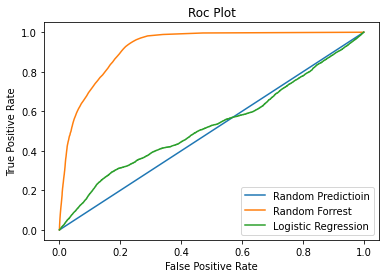

In [41]:
#plotting roc curve
plt.plot(r_fpr,r_tpr, label= "Random Predictioin")
plt.plot(rf_fpr , rf_tpr, label="Random Forrest")
plt.plot(l_fpr , l_tpr, label="Logistic Regression")


plt.title("Roc Plot")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()